In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from miceforest import ImputationKernel
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [6]:
data = pd.read_csv('METABRIC_RNA_Mutation.csv')
data.drop(["patient_id"],axis=1,inplace = True)
data.head()

C:\Users\Marcin\AppData\Local\Temp\ipykernel_54896\2152324155.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('METABRIC_RNA_Mutation.csv')


,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.describe(include='all')

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
count,1904.000000,1882,1904,1889,1850,1904.000000,1904,1904.000000,1874,1904,...,1904,1904,1904,1904,1904,1904.0,1904,1904.0,1904,1904.0
unique,NaN,2,2,6,3,NaN,7,NaN,2,2,...,5,5,5,4,4,4.0,3,4.0,3,3.0
top,NaN,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NaN,LumA,NaN,Positve,Positive,...,0,0,0,0,0,0.0,0,0.0,0,0.0
freq,NaN,1127,1903,1500,939,NaN,679,NaN,1445,1459,...,1900,1900,1900,1901,1901,1024.0,1902,1024.0,1902,1024.0
mean,61.087054,NaN,NaN,NaN,NaN,0.207983,NaN,2.643908,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.978711,NaN,NaN,NaN,NaN,0.405971,NaN,1.228615,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,21.930000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,51.375000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,61.770000,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,70.592500,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(data.isnull().sum())

age_at_diagnosis           0
type_of_breast_surgery    22
cancer_type                0
cancer_type_detailed      15
cellularity               54
                          ..
hras_mut                   0
prps2_mut                  0
smarcb1_mut                0
stmn2_mut                  0
siah1_mut                  0
Length: 692, dtype: int64


## Survival Prediction
### Clinical data only

In [25]:
data_survival = data[data['death_from_cancer'].notnull()].copy()
clinical_data = data_survival[data_survival.columns[:30]].copy()
clinical_data

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,Positive,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,Positive,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,Positive,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,Positive,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


Lets start handling missing values. There are few types of missing data:

* Missing Completely at Random (MCAR) - In MCAR, the probability of a value being missing is unrelated to any observed or unobserved data.

* Missing at Random (MAR) - In MAR, the probability of a value being missing depends only on observed data and not on unobserved data.

* Missing Not at Random (MNAR) - In MNAR, the probability of a value being missing depends on unobserved data.


Lets analyze missing data patterns.


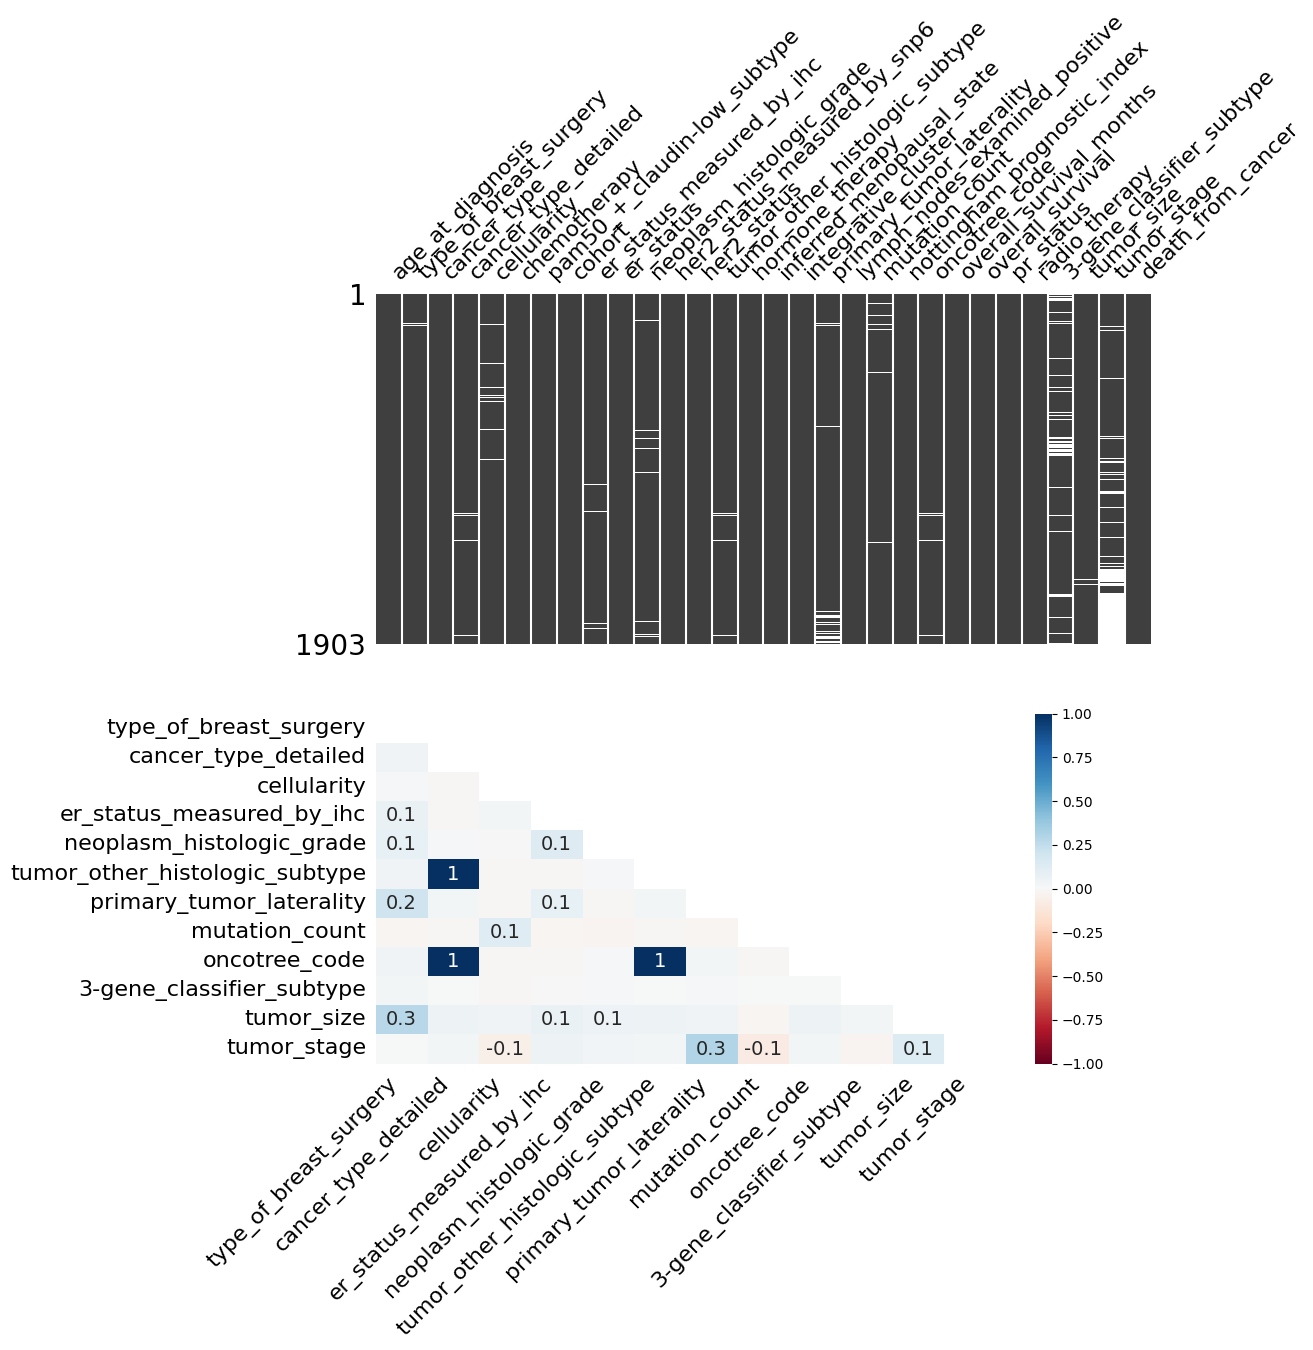

In [26]:
import missingno as msno

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
ax1 = msno.matrix(clinical_data, ax=axes[0],sparkline=False)
ax2 = msno.heatmap(clinical_data, ax=axes[1])
plt.show()

Based on given results it's hard to indicate with great confidence type of missing values. But given heatmap values, data is definitely not missing completely at random. In that case we can use *Multiple imputation* to deal with missing values.

In [27]:
encoder = LabelEncoder()
clinical_data['death_from_cancer']=encoder.fit_transform(clinical_data['death_from_cancer'])
clinical_data_encoded = pd.get_dummies(clinical_data)
clinical_data_encoded.columns = [re.sub(r'[!@#$%^&*(){}\[\];:,./<>?\\|`~\=_\']', '_', col) for col in clinical_data_encoded.columns]
clinical_data_encoded.describe()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage,death_from_cancer
count,1903.000000,1903.000000,1903.000000,1831.000000,1903.000000,1903.000000,1858.000000,1903.000000,1903.000000,1903.000000,1903.000000,1883.000000,1402.000000,1903.000000
mean,61.088355,0.208092,2.643720,2.415620,0.616921,2.003153,5.693757,4.033020,125.053074,0.420914,0.596952,26.244695,1.751070,1.094062
std,12.981999,0.406050,1.228911,0.650646,0.486265,4.080807,4.056331,1.144792,76.296083,0.493836,0.490639,15.162789,0.628904,0.859830
min,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,51.370000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.783333,0.000000,0.000000,17.000000,1.000000,0.000000
50%,61.780000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.600000,0.000000,1.000000,23.000000,2.000000,1.000000
75%,70.595000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040500,184.550000,1.000000,1.000000,30.000000,2.000000,2.000000
max,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000,2.000000


In [29]:
mice_kernel = ImputationKernel(
data = clinical_data_encoded,
save_all_iterations = True,
random_state = 42
)
mice_kernel.mice(2)
data_full = mice_kernel.complete_data()
data_full.describe()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage,death_from_cancer
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,61.088355,0.208092,2.643720,2.366789,0.616921,2.003153,5.635313,4.033020,125.053074,0.420914,0.596952,26.245801,1.782974,1.094062
std,12.981999,0.406050,1.228911,0.687113,0.486265,4.080807,4.036174,1.144792,76.296083,0.493836,0.490639,15.181373,0.606384,0.859830
min,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,51.370000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.783333,0.000000,0.000000,17.000000,1.000000,0.000000
50%,61.780000,0.000000,3.000000,2.000000,1.000000,0.000000,5.000000,4.042000,115.600000,0.000000,1.000000,23.000000,2.000000,1.000000
75%,70.595000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040500,184.550000,1.000000,1.000000,30.000000,2.000000,2.000000
max,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000,2.000000


In [31]:
columns_to_keep = data_full.columns != 'death_from_cancer'
X = data_full.loc[:,columns_to_keep]
y = data_full['death_from_cancer']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
def train_models(models, scoring, X, y, cv):
    names = []
    results = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []
    fit_time_scores = []
    HEADER = '\033[95m'
    WARNING = '\033[93m'
    ENDC = '\033[0m'
    print(HEADER + "Running..."+ENDC)
    for name, model in models:
        result = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
        names.append(name)
        results.append(result)
        accuracy_scores.append(result['test_accuracy'].mean())
        precision_scores.append(result['test_precision'].mean())
        recall_scores.append(result['test_recall'].mean())
        f1_scores.append(result['test_f1'].mean())
        roc_auc_scores.append(result['test_roc_auc'].mean())
        fit_time_scores.append(result['fit_time'].sum())
        print(WARNING + f"Progress: {name} finished in {result['fit_time'].sum():.2f} seconds!" + ENDC)
        print(HEADER + "Results:"+ENDC)
        print(f"Accuracy: {accuracy_scores[-1]:.2f}")
        print(f"Precision: {precision_scores[-1]:.2f}")
        print(f"Recall: {recall_scores[-1]:.2f}")
        print(f"F1 Score: {f1_scores[-1]:.2f}")
        print(f"ROC-AUC Score: {roc_auc_scores[-1]:.2f}")
        print(HEADER + "---------------------------------------"+ENDC)
    print(HEADER + "Done!"+ENDC)
    # Plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC','Fit Time']
    scores = [accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores,fit_time_scores]
    
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Model Performance Metrics')
    
    sns.set(style="whitegrid")
    palette = sns.color_palette("pastel", n_colors=len(names))
    
    for i, ax in enumerate(axs.flat):
        sns.barplot(x=names, y=scores[i], hue=names, ax=ax, palette=palette, dodge=False, legend=False)
        ax.set_title(metrics[i])
        ax.set_ylabel('Score' if i != 5 else 'Seconds')
        ax.set_xlabel('Model')
        ax.set_ylim(0, 1) if i != 5 else None
        ax.grid(True)
        ax.set_xticks(names)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    
    return names, results

Running...
Progress: LogisticRegression finished in 0.28 seconds!
Results:
Accuracy: 0.78
Precision: 0.77
Recall: 0.76
F1 Score: 0.75
ROC-AUC Score: 0.92
---------------------------------------
Progress: RandomForest finished in 1.43 seconds!
Results:
Accuracy: 0.83
Precision: 0.81
Recall: 0.80
F1 Score: 0.80
ROC-AUC Score: 0.94
---------------------------------------
Progress: KNeighbors finished in 0.02 seconds!
Results:
Accuracy: 0.56
Precision: 0.55
Recall: 0.54
F1 Score: 0.54
ROC-AUC Score: 0.72
---------------------------------------
Progress: DecisionTree finished in 0.07 seconds!
Results:
Accuracy: 0.80
Precision: 0.77
Recall: 0.77
F1 Score: 0.76
ROC-AUC Score: 0.86
---------------------------------------
Progress: NaiveBayes finished in 0.03 seconds!
Results:
Accuracy: 0.79
Precision: 0.76
Recall: 0.75
F1 Score: 0.75
ROC-AUC Score: 0.92
---------------------------------------
Done!


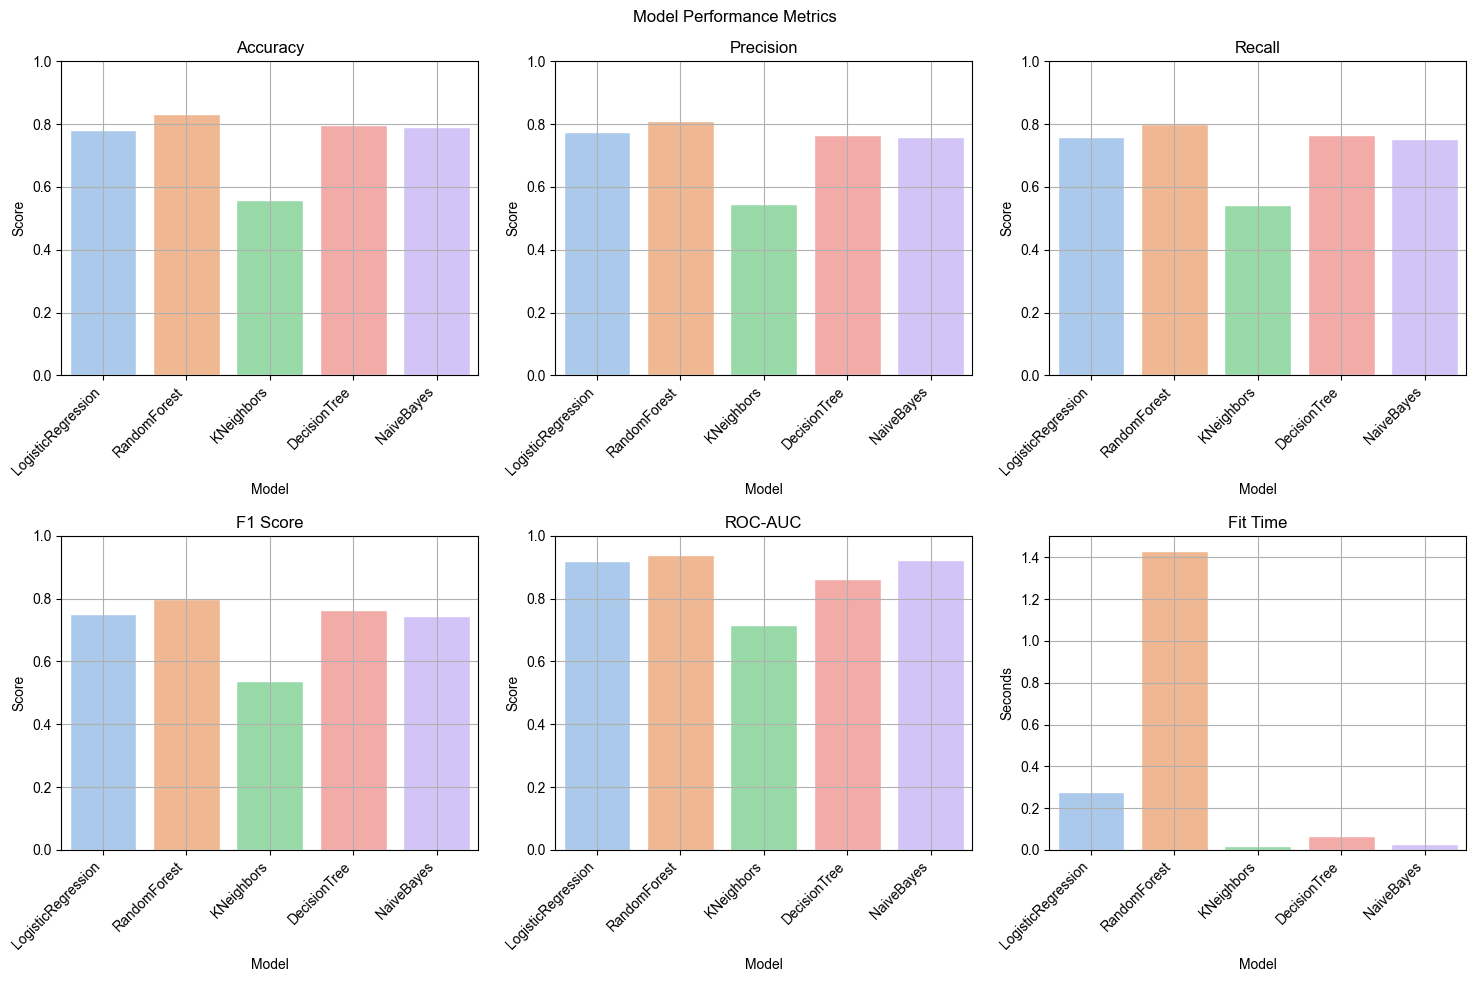

In [34]:
models = [("LogisticRegression",LogisticRegression()),
         ("RandomForest",RandomForestClassifier(random_state=42,max_depth=10)),
         ("KNeighbors",KNeighborsClassifier()),
         ("DecisionTree",DecisionTreeClassifier(random_state=42,max_depth=10)),
         ("NaiveBayes",GaussianNB())]
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro',
           'roc_auc': 'roc_auc_ovr'}
names , results = train_models(models=models,scoring=scoring,X=X,y=y,cv=5)

### Genetic data only
Lets make dataset and make sure that there are no missing values

In [64]:
genetic_data = data_survival[data_survival.columns[30:519]].copy()
genetic_data.isnull().sum().sum()

0

In [66]:
genetic_data.describe(include='all')

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,...,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.00000,1903.000000,1903.000000
mean,0.000410,0.001073,-0.001062,-0.000312,-0.000356,0.001180,0.000214,-0.000290,-0.000263,0.000074,...,0.000170,0.000363,0.000606,-0.000203,-0.000633,-0.000451,-0.000325,0.00013,0.000169,-0.000377
std,1.000364,0.999428,0.999451,1.000433,1.000404,0.999198,1.000483,1.000445,1.000460,1.000519,...,1.000499,1.000399,1.000174,1.000486,1.000146,1.000332,1.000424,1.00051,1.000498,1.000390
min,-2.444400,-2.783500,-4.384600,-5.932800,-2.481200,-3.170500,-3.323700,-2.688700,-3.689800,-2.968600,...,-2.120800,-3.364800,-2.719400,-4.982700,-2.981700,-3.833300,-3.609300,-1.16690,-2.112600,-1.051600
25%,-0.718300,-0.698550,-0.680250,-0.558900,-0.666200,-0.658250,-0.459000,-0.738900,-0.667050,-0.684050,...,-0.618900,-0.609900,-0.673350,-0.614050,-0.633200,-0.666550,-0.710300,-0.50585,-0.476500,-0.726000
50%,-0.124000,-0.057800,-0.023900,0.108700,-0.035200,-0.003200,0.115800,-0.131600,-0.014900,-0.053700,...,-0.245400,-0.046400,-0.141800,-0.052000,-0.028000,0.000200,-0.030100,-0.28860,-0.133400,-0.426200
75%,0.553250,0.629000,0.638400,0.642750,0.643050,0.690400,0.650100,0.539600,0.639450,0.669450,...,0.330700,0.515400,0.514800,0.578950,0.590150,0.641850,0.595050,0.06025,0.270950,0.422000
max,4.554200,3.737900,4.615000,3.254100,4.289800,3.824200,2.820900,4.538200,5.371300,6.178600,...,6.534900,10.270300,6.329000,4.571300,12.742300,3.938800,3.833400,10.88490,12.643900,3.284400


Running...
Progress: LogisticRegression finished in 1.62 seconds!
Results:
Accuracy: 0.38
Precision: 0.37
Recall: 0.37
F1 Score: 0.36
ROC-AUC Score: 0.54
---------------------------------------
Progress: RandomForest finished in 23.14 seconds!
Results:
Accuracy: 0.42
Precision: 0.41
Recall: 0.38
F1 Score: 0.35
ROC-AUC Score: 0.59
---------------------------------------
Progress: KNeighbors finished in 0.09 seconds!
Results:
Accuracy: 0.39
Precision: 0.37
Recall: 0.36
F1 Score: 0.35
ROC-AUC Score: 0.55
---------------------------------------
Progress: DecisionTree finished in 6.30 seconds!
Results:
Accuracy: 0.38
Precision: 0.37
Recall: 0.36
F1 Score: 0.36
ROC-AUC Score: 0.51
---------------------------------------
Progress: NaiveBayes finished in 0.15 seconds!
Results:
Accuracy: 0.41
Precision: 0.43
Recall: 0.42
F1 Score: 0.39
ROC-AUC Score: 0.60
---------------------------------------
Done!


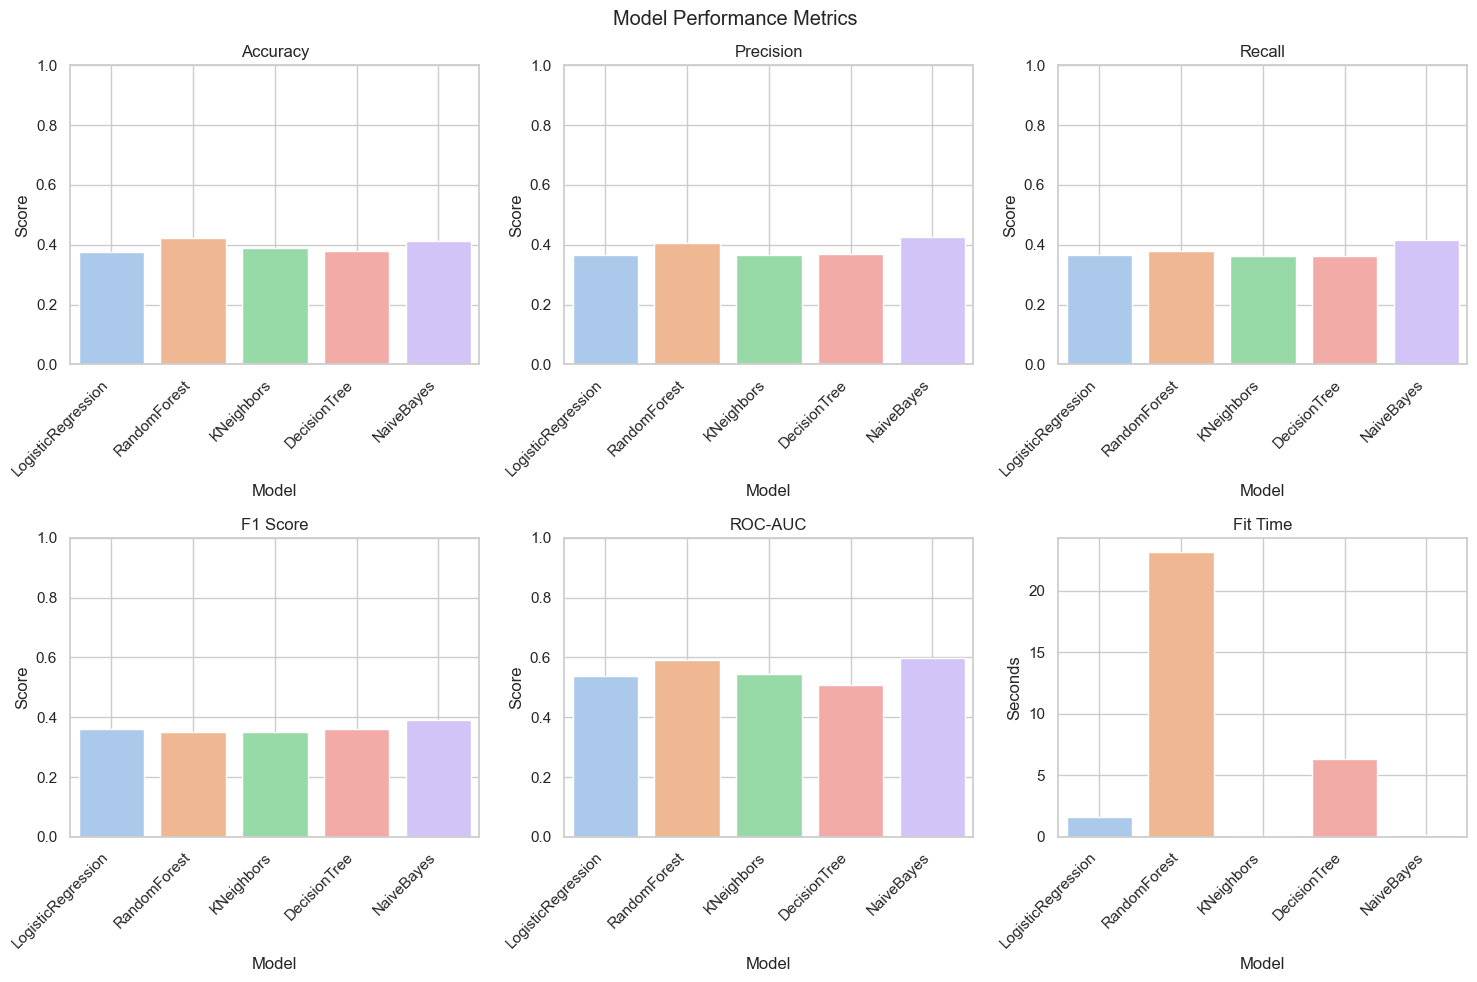

In [67]:
models = [("LogisticRegression",LogisticRegression()),
         ("RandomForest",RandomForestClassifier(random_state=42,max_depth=10)),
         ("KNeighbors",KNeighborsClassifier()),
         ("DecisionTree",DecisionTreeClassifier(random_state=42,max_depth=10)),
         ("NaiveBayes",GaussianNB())]
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro',
           'roc_auc': 'roc_auc_ovr'}
names , results = train_models(models=models,scoring=scoring,X=genetic_data,y=y,cv=5)

### All of the data

In [68]:
merged_data = pd.concat([data_full, genetic_data], axis=1)
merged_data.describe(include='all')

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,...,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.00000,1903.000000,1903.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,61.088355,0.208092,2.643720,2.366789,0.616921,2.003153,5.635313,4.033020,125.053074,0.420914,...,0.000170,0.000363,0.000606,-0.000203,-0.000633,-0.000451,-0.000325,0.00013,0.000169,-0.000377
std,12.981999,0.406050,1.228911,0.687113,0.486265,4.080807,4.036174,1.144792,76.296083,0.493836,...,1.000499,1.000399,1.000174,1.000486,1.000146,1.000332,1.000424,1.00051,1.000498,1.000390
min,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-2.120800,-3.364800,-2.719400,-4.982700,-2.981700,-3.833300,-3.609300,-1.16690,-2.112600,-1.051600
25%,51.370000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.783333,0.000000,...,-0.618900,-0.609900,-0.673350,-0.614050,-0.633200,-0.666550,-0.710300,-0.50585,-0.476500,-0.726000
50%,61.780000,0.000000,3.000000,2.000000,1.000000,0.000000,5.000000,4.042000,115.600000,0.000000,...,-0.245400,-0.046400,-0.141800,-0.052000,-0.028000,0.000200,-0.030100,-0.28860,-0.133400,-0.426200
75%,70.595000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040500,184.550000,1.000000,...,0.330700,0.515400,0.514800,0.578950,0.590150,0.641850,0.595050,0.06025,0.270950,0.422000


In [69]:
columns_to_keep = merged_data.columns != 'death_from_cancer'
X = merged_data.loc[:,columns_to_keep]
y = merged_data['death_from_cancer']

Running...
Progress: LogisticRegression finished in 2.27 seconds!
Results:
Accuracy: 0.61
Precision: 0.61
Recall: 0.59
F1 Score: 0.59
ROC-AUC Score: 0.79
---------------------------------------
Progress: RandomForest finished in 20.19 seconds!
Results:
Accuracy: 0.73
Precision: 0.71
Recall: 0.68
F1 Score: 0.68
ROC-AUC Score: 0.90
---------------------------------------
Progress: KNeighbors finished in 0.10 seconds!
Results:
Accuracy: 0.57
Precision: 0.55
Recall: 0.55
F1 Score: 0.55
ROC-AUC Score: 0.71
---------------------------------------
Progress: DecisionTree finished in 3.95 seconds!
Results:
Accuracy: 0.77
Precision: 0.73
Recall: 0.73
F1 Score: 0.72
ROC-AUC Score: 0.82
---------------------------------------
Progress: NaiveBayes finished in 0.20 seconds!
Results:
Accuracy: 0.78
Precision: 0.74
Recall: 0.74
F1 Score: 0.74
ROC-AUC Score: 0.90
---------------------------------------
Done!


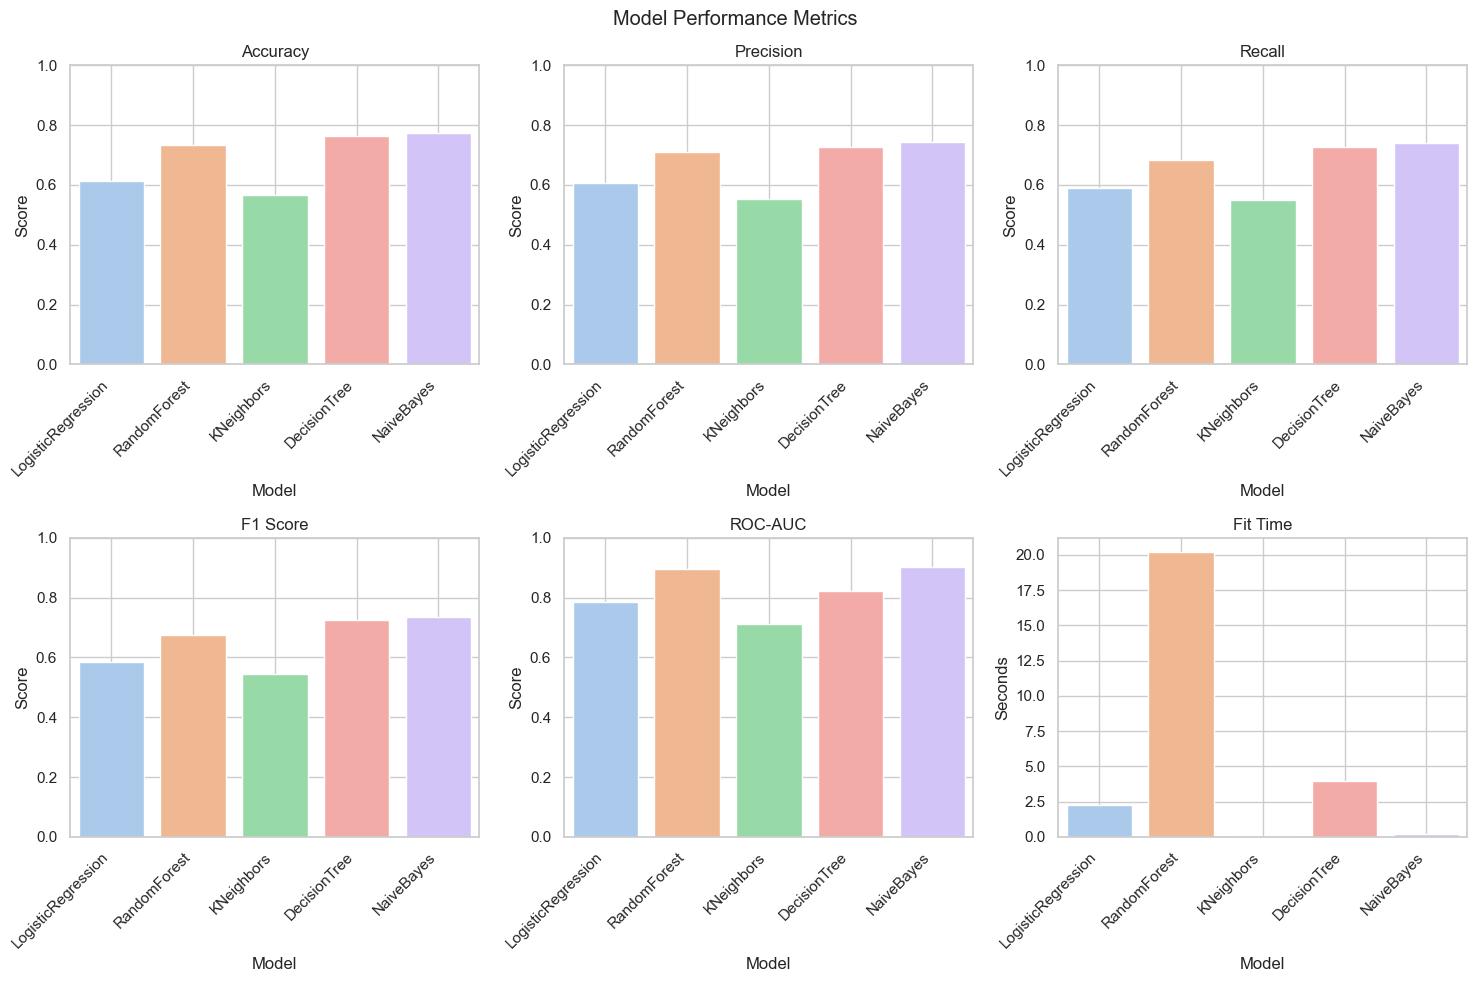

In [70]:
models = [("LogisticRegression",LogisticRegression()),
         ("RandomForest",RandomForestClassifier(random_state=42,max_depth=10)),
         ("KNeighbors",KNeighborsClassifier()),
         ("DecisionTree",DecisionTreeClassifier(random_state=42,max_depth=10)),
         ("NaiveBayes",GaussianNB())]
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro',
           'roc_auc': 'roc_auc_ovr'}
names , results = train_models(models=models,scoring=scoring,X=X,y=y,cv=5)